In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, PrecisionRecallDisplay

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2 



from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks,RandomUnderSampler

from collections import Counter

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("df_preprocessed.csv", skipinitialspace= True)

df

,tweet,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,...,Hash_words_ad,clean_tweet,clean_anonymized_description,tweet_len,word_count,tokenized_text,pos_tags,lemmatized_text,stemmed_text,swear_word_bin
0,@unknown Con tutte le denunce che si sta becca...,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,...,No hashtags,Con tutte le denunce che si sta beccando Salvi...,Avete presente quegli stereotipi sui siciliani...,119,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...","[('denunce', 'NOUN'), ('beccando', 'VERB'), ('...","['denuncia', 'beccare', 'Salvini', 'rischiare'...","['denunc', 'becc', 'salvin', 'risc', 'aument',...",0
1,#PRESCRIZIONE : I (t)re magi hanno trovato l’a...,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,...,No hashtags,PRESCRIZIONE I tre magi hanno trovato laccordo...,Prof di latino e Deputata PDAma lo sport la Ro...,254,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...","[('PRESCRIZIONE', 'VERB'), ('tre', 'NUM'), ('m...","['PRESCRIZIONE', 'tre', 'mago', 'trovare', 'la...","['prescrizion', 'tre', 'mag', 'trov', 'laccord...",0
2,Il #m5s ha votato contro le #unionicivili addu...,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,...,No hashtags,Il m5s ha votato contro le unionicivili adduce...,Medico appassionato di Cinema d'Autore Musica ...,256,41,"['m5s', 'votato', 'unionicivili', 'adducendo',...","[('m5s', 'NOUN'), ('votato', 'VERB'), ('unioni...","['m5s', 'votare', 'unionicivile', 'adducere', ...","['m5s', 'vot', 'unionicivil', 'adduc', 'scus',...",1
3,La #Lega e il #m5s stanno dando a bere all'opi...,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,...,No hashtags,La Lega e il m5s stanno dando a bere all'opini...,nodescription,247,39,"['Lega', 'm5s', 'dando', 'bere', ""all'opinione...","[('Lega', 'VERB'), ('m5s', 'PROPN'), ('dando',...","['lega', 'm5s', 'dare', 'bere', 'a il', 'opini...","['leg', 'm5s', 'dand', 'ber', ""all'opinion"", '...",0
4,Che cosa cambia questa #legge? Caro @667517147...,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,...,No hashtags,Che cosa cambia questa legge Caro con il decre...,Veneto Assessore Regionale Sviluppo Economico ...,192,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...","[('cambia', 'VERB'), ('legge', 'NOUN'), ('Caro...","['cambiare', 'legge', 'Caro', 'decretoinsicure...","['camb', 'legg', 'car', 'decretoinsicurezz', '...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917,"@306266219847013 Esatto brava , ti dico di piu...",0,1,0.0,0.0,1.0,0.0,10922.0,373.0,491.0,...,No hashtags,Esatto brava ti dico di piu i nazisti nel cerc...,Il Covid e le guerre sono il braccio armato de...,216,38,"['Esatto', 'brava', 'dico', 'piu', 'nazisti', ...","[('Esatto', 'NOUN'), ('brava', 'ADJ'), ('dico'...","['esatto', 'bravo', 'dico', 'piu', 'nazista', ...","['esatt', 'brav', 'dic', 'piu', 'nazist', 'cer...",0
9918,@527727106662135 Togliere la parola non vaccin...,0,1,0.0,0.0,1.0,0.0,721.0,31.0,169.0,...,No hashtags,Togliere la parola non vaccinati e mettere ebr...,Galileo Copernico Giordano Bruno furono consid...,57,10,"['Togliere', 'parola', 'vaccinati', 'mettere',...","[('Togliere', 'VERB'), ('parola', 'NOUN'), ('v...","['Togliere', 'parola', 'vaccinare', 'mettere',...","['togl', 'parol', 'vaccin', 'mett', 'ebre', 'u...",0
9919,@298046772245367 @232578747771124 Lo sai o no ...,0,1,0.0,0.0,1.0,0.0,116.0,9.0,30.0,...,No hashtags,Lo sai o no che i musulmani riconoscono Cristo...,nodescription,116,20,"['sai', 'musulmani', 'riconoscono', 'Cristo', ...","[('sai', 'VERB'), ('musulmani', 'NOUN'), ('ric...","['sai', 'musulmano', 'riconoscere', 'Cristo', ...","['sai', 'musulman', 'riconosc', 'crist', 'prof...",0
9920,Berlino - Memoriale per gli ebrei assassinati ...,0,1,4.0,55.0,0.0,0.0,5672.0,2544.0,2501.0,...,No hashtags,Berlino Memoriale per gli ebrei assassinati dE...,Se pensi di non farcela riordina l'armadio Ten...,66,10,"['Berlino', 'Memoriale', 'ebrei', 'assassinati...","[('Berlino', '

In [3]:
X = df['clean_tweet'].values
y = df['is_hate_speech'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=0)


In [5]:
# TFvectorizer 

TFvectorizer = TfidfVectorizer(
                              ngram_range=(1,3),
                               max_df=.75,
                               min_df = 2,                               )

X_train_tfid = TFvectorizer.fit_transform(X_train)
X_test_tfid = TFvectorizer.transform(X_test)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:

Cntvectorizer = CountVectorizer( # 
                                 ngram_range=(1,3),   # hyperparameter
                                 max_df=.8,
                                 min_df =5)

X_train_cnt = Cntvectorizer.fit_transform(X_train)
X_test_cnt = Cntvectorizer.transform(X_test)

#Looking at the distribution of labels in the target variable, as well as info on the X_train matrix
print(np.unique(y_train, return_counts=True))

(array([0, 1], dtype=int64), array([4655, 2290], dtype=int64))


In [ ]:
clf = xgb.XGBClassifier()
clf.fit(X_train_cnt, y_train)

y_pred = clf.predict(X_test_cnt)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8209606986899564
F1-score_macro: 0.7680354129007689
Classification Report:
              precision    recall  f1-score   support

           0      0.804     0.968     0.879      1996
           1      0.890     0.521     0.657       981

    accuracy                          0.821      2977
   macro avg      0.847     0.745     0.768      2977
weighted avg      0.833     0.821     0.806      2977



In [ ]:
clf = xgb.XGBClassifier()
clf.fit(X_train_tfid, y_train)

y_pred = clf.predict(X_test_tfid)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8139066174000672
F1-score_macro: 0.7615474522967094
Classification Report:
              precision    recall  f1-score   support

           0      0.803     0.956     0.873      1996
           1      0.855     0.524     0.650       981

    accuracy                          0.814      2977
   macro avg      0.829     0.740     0.762      2977
weighted avg      0.821     0.814     0.800      2977



### Pipeline for TFidfVectorizer

In [ ]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, chi2 

# List of text representations
text_representations = ['tokenized_text', 'lemmatized_text']

# Dictionary to store final best results
final_results_dict_tfidf = {}

for text_representation in text_representations:
    X = df[text_representation].values
    y = df['is_hate_speech'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

    # Define a pipeline with TfidfVectorizer and XGBoost
    tfidf_vectorizer = TfidfVectorizer()
    xg = xgb.XGBClassifier()

    tfidf_pipe = Pipeline([
        ('vect', tfidf_vectorizer),
        ('sel', SelectKBest(chi2)),
        ('clf', xg),
    ])

    # Define parameter distributions for RandomizedSearchCV
    param_dist_tfidf = {
        'sel__k':[50,100,200,500,1000,'all'],
        'vect__ngram_range': [(1,1), (1, 2), (1, 3)],
        'vect__max_df': [0.75, 0.8, 0.85],
        'vect__min_df': [2, 5, 7],
        'clf__learning_rate': [0.01, 0.1, 1,0.2],
        'clf__max_depth': [3, 4, 5, 6, 7, 8, 9],
        'clf__gamma': [0, 1, 2, 3],
        'clf__min_child_weight': [1, 2, 3, 4],
        'clf__n_estimators': [100, 200, 300, 400, 500],
    }

    # Create RandomizedSearchCV
    random_search_tfidf = RandomizedSearchCV(
        tfidf_pipe, param_distributions=param_dist_tfidf, scoring='f1_macro',
        n_iter=75, cv=5, n_jobs=15, random_state=42
    )

    # Perform RandomizedSearchCV
    random_search_tfidf.fit(X_train, y_train)

    # Store final best results
    final_results_dict_tfidf[text_representation] = {
        'best_parameters': random_search_tfidf.best_params_,
        'best_f1_score': random_search_tfidf.best_score_,
    }

    # Print best parameters and accuracy
    print(f"Best Parameters for TfidfVectorizer ({text_representation} - RandomizedSearchCV):")
    print(random_search_tfidf.best_params_)
    print("Best f1-score:", random_search_tfidf.best_score_)

    print("                                                                                                                                 ")

    # Evaluate the best model on the test set
    y_pred_tfidf = random_search_tfidf.best_estimator_.predict(X_test)

    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    f1_scores_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
    classification_rep_tfidf = classification_report(y_test, y_pred_tfidf, digits=3)

    print(f'Accuracy (TfidfVectorizer - {text_representation}):', accuracy_tfidf)
    print(f'F1-score_macro (TfidfVectorizer - {text_representation}):', f1_scores_tfidf)
    print(f'Classification Report (TfidfVectorizer - {text_representation}):')
    print(classification_rep_tfidf)

    print("                                                                                                                                 ")
    print("                                                                                                                                 ")

# Convert the dictionary to JSON format
final_results_json_tfidf = json.dumps(final_results_dict_tfidf, indent=2)

# Save the JSON to a file
with open('final_results_tfidf_XGBoost.json', 'w') as file:
    file.write(final_results_json_tfidf)


Best Parameters for TfidfVectorizer (tokenized_text - RandomizedSearchCV):
{'vect__ngram_range': (1, 1), 'vect__min_df': 5, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__n_estimators': 300, 'clf__min_child_weight': 1, 'clf__max_depth': 8, 'clf__learning_rate': 0.1, 'clf__gamma': 1}
Best f1-score: 0.7749163973558224
                                                                                                                                 
Accuracy (TfidfVectorizer - tokenized_text): 0.8343970440040309
F1-score_macro (TfidfVectorizer - tokenized_text): 0.7883990521894151
Classification Report (TfidfVectorizer - tokenized_text):
              precision    recall  f1-score   support

           0      0.817     0.970     0.887      1996
           1      0.901     0.559     0.690       981

    accuracy                          0.834      2977
   macro avg      0.859     0.764     0.788      2977
weighted avg      0.845     0.834     0.822      2977

                                     

### Pipeline for CountVectorizer

In [ ]:



# List of text representations
text_representations = ['tokenized_text', 'lemmatized_text']

# Dictionary to store final best results
final_results_dict_count = {}

for text_representation in text_representations:
    X = df[text_representation].values
    y = df['is_hate_speech'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

    # Define a pipeline with CountVectorizer and LogisticRegression
    count_vectorizer = CountVectorizer()
    xg = xgb.XGBClassifier()

    count_pipe = Pipeline([
        ('vect', count_vectorizer),
        ('sel', SelectKBest(chi2)),
        ('clf', xg),
    ])

    # Define parameter distributions for RandomizedSearchCV
    param_dist_count = {
        'sel__k':[50,100,200,500,1000,'all'],
        'vect__ngram_range': [(1,1), (1, 2), (1, 3)],
        'vect__max_df': [0.75, 0.8, 0.85],
        'vect__min_df': [2, 5, 7],
        'clf__learning_rate': [0.01, 0.1, 0.2,1],
        'clf__max_depth': [3, 4, 5, 6, 7, 8, 9],
        'clf__gamma': [0, 1, 2, 3],
        'clf__min_child_weight': [1, 2, 3, 4],
        'clf__n_estimators': [100, 200, 300, 400, 500],
}

    # Create RandomizedSearchCV
    random_search_count = RandomizedSearchCV(
        count_pipe, param_distributions=param_dist_count, scoring='f1_macro',
        n_iter=75, cv=5, n_jobs=15, random_state=42
    )

    # Perform RandomizedSearchCV
    random_search_count.fit(X_train, y_train)

    # Store final best results
    final_results_dict_count[text_representation] = {
        'best_parameters': random_search_count.best_params_,
        'best_f1_score': random_search_count.best_score_,
    }

        # Print best parameters and accuracy
    print(f"Best Parameters for CountVectorizer ({text_representation} - RandomizedSearchCV):")
    print(random_search_count.best_params_)
    print("Best f1-score:", random_search_count.best_score_)

    print("                                                                                                                                 ")

    # Evaluate the best model on the test set
    y_pred_tfidf = random_search_count.best_estimator_.predict(X_test)

    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    f1_scores_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
    classification_rep_tfidf = classification_report(y_test, y_pred_tfidf, digits = 3)

    print(f'Accuracy (CountVectorizer - {text_representation}):', accuracy_tfidf)
    print(f'F1-score_macro (CountVectorizer - {text_representation}):', f1_scores_tfidf)
    print(f'Classification Report (CountVectorizer - {text_representation}):')
    print(classification_rep_tfidf)

    print("                                                                                                                                 ")
    print("                                                                                                                                 ")


# Convert the dictionary to JSON format
final_results_json_count = json.dumps(final_results_dict_count, indent=2)

# Save the JSON to a file
with open('final_results_count_XGBoost.json', 'w') as file:
    file.write(final_results_json_count)



Best Parameters for CountVectorizer (tokenized_text - RandomizedSearchCV):
{'vect__ngram_range': (1, 3), 'vect__min_df': 7, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__n_estimators': 400, 'clf__min_child_weight': 1, 'clf__max_depth': 5, 'clf__learning_rate': 1, 'clf__gamma': 2}
Best f1-score: 0.7802995718271095
                                                                                                                                 
Accuracy (CountVectorizer - tokenized_text): 0.834061135371179
F1-score_macro (CountVectorizer - tokenized_text): 0.7918195963675114
Classification Report (CountVectorizer - tokenized_text):
              precision    recall  f1-score   support

           0      0.823     0.958     0.886      1996
           1      0.872     0.582     0.698       981

    accuracy                          0.834      2977
   macro avg      0.848     0.770     0.792      2977
weighted avg      0.839     0.834     0.824      2977

                                        

### Balancing for CountVect
- {'vect__ngram_range': (1, 3), 'vect__min_df': 7, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__n_estimators': 400, 'clf__min_child_weight': 1, 'clf__max_depth': 5, 'clf__learning_rate': 1, 'clf__gamma': 2}



In [ ]:

X = df['tokenized_text'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

# TfidfVectorizer
vectorizer = CountVectorizer(
    ngram_range=(1, 3),
    max_df=0.75,
    min_df=7
)

X_train_tfid = vectorizer.fit_transform(X_train)
X_test_tfid = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=200)
X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_tfid_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

clf_tomek = xgb.XGBClassifier(
    n_estimators=400,
    min_child_weight=1,
    max_depth=5,
    learning_rate=1,
    gamma=2
)

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_tfid_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek, digits = 3)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

# SMOTE
smote = SMOTE(random_state = 10)
X_res_smote, y_res_smote = smote.fit_resample(X_train_tfid_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

clf_smote = xgb.XGBClassifier(
    n_estimators=400,
    min_child_weight=1,
    max_depth=5,
    learning_rate=1,
    gamma=2
)

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_tfid_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote, digits = 3)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

# ADASYN
adasyn = ADASYN(random_state = 10)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train_tfid_selected, y_train)
print('ADASYN Resampled dataset shape %s' % Counter(y_res_adasyn))

# ADASYN
clf_adasyn = xgb.XGBClassifier(
    n_estimators=400,
    min_child_weight=1,
    max_depth=5,
    learning_rate=1,
    gamma=2
)

clf_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = clf_adasyn.predict(X_test_tfid_selected)

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
f1_scores_adasyn = f1_score(y_test, y_pred_adasyn, average='macro')
classification_rep_adasyn = classification_report(y_test, y_pred_adasyn, digits = 3)

print('ADASYN:')
print('Accuracy:', accuracy_adasyn)
print('F1-score_macro:', f1_scores_adasyn)
print('Classification Report:')
print(classification_rep_adasyn)


Tomek Resampled dataset shape Counter({0: 4652, 1: 2290})
Tomek Links:
Accuracy: 0.8333893181054753
F1-score_macro: 0.7906583734835906
Classification Report:
              precision    recall  f1-score   support

           0      0.822     0.958     0.885      1996
           1      0.873     0.579     0.696       981

    accuracy                          0.833      2977
   macro avg      0.847     0.769     0.791      2977
weighted avg      0.839     0.833     0.823      2977

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.8296943231441049
F1-score_macro: 0.7909214635534954
Classification Report:
              precision    recall  f1-score   support

           0      0.829     0.940     0.881      1996
           1      0.832     0.606     0.701       981

    accuracy                          0.830      2977
   macro avg      0.830     0.773     0.791      2977
weighted avg      0.830     0.830     0.822      2977

ADASYN Resampled dataset shape Count

### Balancing for Tfidf
- {'vect__ngram_range': (1, 1), 'vect__min_df': 5, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__n_estimators': 300, 'clf__min_child_weight': 1, 'clf__max_depth': 8, 'clf__learning_rate': 0.1, 'clf__gamma': 1}



In [ ]:

X = df['tokenized_text'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)


# TfidfVectorizer
vectorizer = TfidfVectorizer(
    ngram_range=(1, 1),
    max_df=0.75,
    min_df=5
)

X_train_tfid = vectorizer.fit_transform(X_train)
X_test_tfid = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=200)
X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_tfid_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

clf_tomek = xgb.XGBClassifier(
    n_estimators=300,
    min_child_weight=1,
    max_depth=8,
    learning_rate=0.1,
    gamma=1
)

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_tfid_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek, digits = 3)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

# SMOTE
smote = SMOTE(random_state = 10)
X_res_smote, y_res_smote = smote.fit_resample(X_train_tfid_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

clf_smote = xgb.XGBClassifier(
    n_estimators=300,
    min_child_weight=1,
    max_depth=8,
    learning_rate=0.1,
    gamma=1
)

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_tfid_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote, digits = 3)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

# ADASYN
adasyn = ADASYN(random_state = 10)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train_tfid_selected, y_train)
print('ADASYN Resampled dataset shape %s' % Counter(y_res_adasyn))

clf_adasyn = xgb.XGBClassifier(
    n_estimators=300,
    min_child_weight=1,
    max_depth=8,
    learning_rate=0.1,
    gamma=1
)

clf_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = clf_adasyn.predict(X_test_tfid_selected)

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
f1_scores_adasyn = f1_score(y_test, y_pred_adasyn, average='macro')
classification_rep_adasyn = classification_report(y_test, y_pred_adasyn, digits = 3)

print('ADASYN:')
print('Accuracy:', accuracy_adasyn)
print('F1-score_macro:', f1_scores_adasyn)
print('Classification Report:')
print(classification_rep_adasyn)


Tomek Resampled dataset shape Counter({0: 4390, 1: 2290})
Tomek Links:
Accuracy: 0.8347329526368827
F1-score_macro: 0.7905751346899558
Classification Report:
              precision    recall  f1-score   support

           0      0.820     0.965     0.887      1996
           1      0.889     0.570     0.694       981

    accuracy                          0.835      2977
   macro avg      0.854     0.767     0.791      2977
weighted avg      0.843     0.835     0.823      2977

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.8320456835740678
F1-score_macro: 0.7903993466261123
Classification Report:
              precision    recall  f1-score   support

           0      0.824     0.953     0.884      1996
           1      0.859     0.586     0.697       981

    accuracy                          0.832      2977
   macro avg      0.842     0.770     0.790      2977
weighted avg      0.836     0.832     0.822      2977

ADASYN Resampled dataset shape Count

### Confusion matrix and PR curve for the CountVect model
- {'vect__ngram_range': (1, 3), 'vect__min_df': 7, 'vect__max_df': 0.75, 'sel__k': 200, 'clf__n_estimators': 400, 'clf__min_child_weight': 1, 'clf__max_depth': 5, 'clf__learning_rate': 1, 'clf__gamma': 2}


SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.8296943231441049
F1-score_macro: 0.7909214635534954
Classification Report:
              precision    recall  f1-score   support

           0      0.829     0.940     0.881      1996
           1      0.832     0.606     0.701       981

    accuracy                          0.830      2977
   macro avg      0.830     0.773     0.791      2977
weighted avg      0.830     0.830     0.822      2977



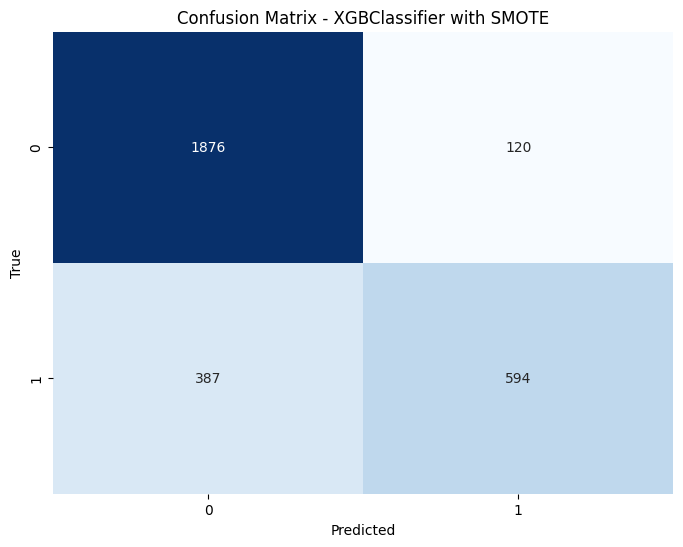

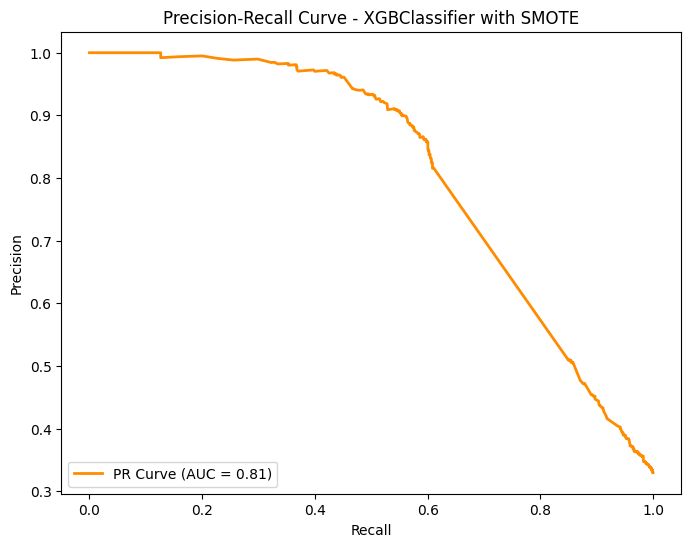

Precision-Recall Metrics:
AUC Score: 0.812004977158439


In [ ]:
X = df['tokenized_text'].values
y = df['is_hate_speech'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)



# CountVectorizer
vectorizer = CountVectorizer(
    ngram_range=(1, 3),
    max_df=0.75,
    min_df=7
)


X_train_tfid = vectorizer.fit_transform(X_train)
X_test_tfid = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=200)

X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)


# SMOTE
smote = SMOTE(random_state = 10)
X_res_smote, y_res_smote = smote.fit_resample(X_train_tfid_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

clf_smote = xgb.XGBClassifier(
    n_estimators=400,
    min_child_weight=1,
    max_depth=5,
    learning_rate=1,
    gamma=2
)

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_tfid_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote, digits = 3)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

cm = confusion_matrix(y_test, y_pred_smote)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBClassifier with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, clf_smote.predict_proba(X_test_tfid_selected)[:, 1])

# Calculate area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBClassifier with SMOTE')
plt.legend(loc='lower left')
plt.show()

# Display precision-recall metrics
print("Precision-Recall Metrics:")
print("AUC Score:", auc_score)


# Model with metadata


In [ ]:
df = pd.read_csv("df_preprocessed.csv", skipinitialspace= True)
df = df.drop(['Hash_words_ad','Hash_words_tweet','anonymized_description','tweet','Weighted_Engagement','clean_anonymized_description', 'clean_tweet', 'lemmatized_text', 'stemmed_text', 'pos_tags'], axis = 1 )
df.head()


,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,device,tweet_len,word_count,tokenized_text,swear_word_bin
0,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,5,120,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...",0
1,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,5,255,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...",0
2,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,5,255,40,"['m5s', 'votato', 'unionicivili', 'adducendo',...",1
3,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,3,246,38,"['Lega', 'm5s', 'dando', 'bere', 'allopinione'...",0
4,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,4,195,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...",0


In [ ]:
X_tweet = df['tokenized_text'].values
y = df['is_hate_speech'].values

In [ ]:
Cntvectorizer = CountVectorizer( # 
                                 ngram_range=(1,3),   # hyperparameter
                                 max_df=.75,
                                 min_df = 5)

X_tweet_cnt = Cntvectorizer.fit_transform(X_tweet)   # Vectorize the whole tokenized_text


In [ ]:
# Try Tfid vectorizer same approach 


TFvectorizer = TfidfVectorizer(
                              ngram_range=(1,1),
                               max_df=.8,
                               min_df = 2
                               )

X_tweet_tfid = TFvectorizer.fit_transform(X_tweet)


In [ ]:
df_meta = pd.read_csv("dataset_final.csv", skipinitialspace= True)
df_meta = df.drop(['is_hate_speech', 'tokenized_text', 'tweet_len'], axis = 1 )


df_meta = df_meta.values

In [ ]:
# MERGE vectorized Tweet and metadata
# Keep SPARSE MATRIX

from scipy.sparse import hstack

merged_sparse_cnt = hstack([X_tweet_cnt, df_meta])


# Print the shape of the merged sparse matrix
print(merged_sparse_cnt.shape)


(9922, 5415)


In [ ]:
# MERGE vectorized Tweet and metadata
# Keep SPARSE MATRIX

merged_sparse_tfid = hstack([X_tweet_tfid, df_meta])


# Print the shape of the merged sparse matrix
print(merged_sparse_tfid.shape)

(9922, 12209)


In [ ]:
X_train_meta_cnt, X_test_meta_cnt, y_train, y_test = train_test_split(merged_sparse_cnt, y, stratify = y, test_size=0.3, random_state=0)
X_train_meta_tfid, X_test_meta_tfid, y_train, y_test = train_test_split(merged_sparse_tfid, y, stratify = y, test_size=0.3, random_state=0)

#Split to train and test for both vectorizers

In [ ]:
clf = xgb.XGBClassifier(n_estimators = 300, min_child_weight = 1, max_depth = 3, learning_rate = 0.3, gamma = 0 )

clf.fit(X_train_meta_cnt, y_train)

y_pred = clf.predict(X_test_meta_cnt)


accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3 )

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8219684245885119
F1-score_macro: 0.7727907649204298
Classification Report:
              precision    recall  f1-score   support

           0      0.810     0.960     0.878      1996
           1      0.869     0.541     0.667       981

    accuracy                          0.822      2977
   macro avg      0.839     0.751     0.773      2977
weighted avg      0.829     0.822     0.809      2977



In [ ]:
# Feature selection with SelectKBest
k_best = SelectKBest(chi2, k=100)

X_train_selected = k_best.fit_transform(X_train_meta_tfid, y_train)
X_test_selected = k_best.transform(X_test_meta_tfid)



clf = XGBClassifier(
    n_estimators=200,
    min_child_weight=1,
    max_depth=9,
    learning_rate=0.2,
    gamma=1
)

clf.fit(X_train_selected, y_train)

y_pred = clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits=3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.8229761504870675
F1-score_macro: 0.773805883374892
Classification Report:
              precision    recall  f1-score   support

           0      0.810     0.961     0.879      1996
           1      0.873     0.541     0.668       981

    accuracy                          0.823      2977
   macro avg      0.842     0.751     0.774      2977
weighted avg      0.831     0.823     0.810      2977

